# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv("./real_estate_data_chicago.csv")
df

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,single_family,WEST ELSDON BRICK SINGLE FAMILY RAISED RANCH H...,1961.0,3.0,2.0,2.0,NaN,2.0,NaN,2080.0,1.0,148000.0,2000-09-15,319900.0,for_sale
1996,condos,Welcome to your spacious three bedroom condo i...,1962.0,3.0,2.0,2.0,NaN,1.0,NaN,1498.0,27.0,NaN,NaN,260000.0,for_sale
1997,condos,Luxury Residence with jaw dropping City and Ri...,2002.0,3.0,3.0,2.0,1.0,3.0,NaN,3700.0,37.0,1705000.0,2016-06-03,1449000.0,for_sale
1998,multi_family,"Welcome to this charming & RARE, meticulously ...",1946.0,6.0,5.0,5.0,NaN,2.0,6200.0,3654.0,NaN,NaN,NaN,749000.0,for_sale


In [34]:
# Drop Duplicates
df = df.drop_duplicates()
df.shape

(1998, 15)

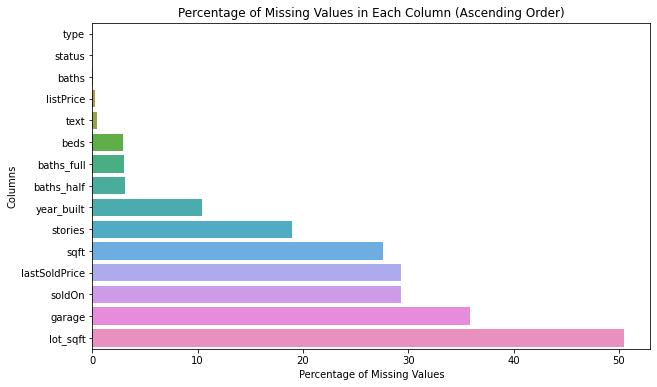

In [35]:
 #Fill NaN values in bath_half columns (bath = bath_half + bath_full)
df['baths_half'] = df['baths'] -  df['baths_full']

# Calculate the percentage of missing values for each column
missing_values_percentage = df.isnull().mean() * 100

# Now you can sort and visualize the missing values
missing_values_percentage_sorted = missing_values_percentage.sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage_sorted, y=missing_values_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column (Ascending Order)')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()  

### Research Question: 

#### How have listing prices (listPrice) changed over time (soldOn) in the Chicago real estate market?

In [36]:
# Drop rows with missing values in 'listPrice' or 'soldOn'
df = df.dropna(subset=['listPrice', 'soldOn'])
df.shape

(1408, 15)

In [37]:
# Convert 'listPrice' to numeric
df['listPrice'] = pd.to_numeric(df['listPrice'], errors='coerce')

# Convert 'soldOn' to datetime
df['soldOn'] = pd.to_datetime(df['soldOn'], errors='coerce')

df.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,0.0,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
5,single_family,Welcome to your serene sanctuary overlooking G...,1921.0,4.0,3.0,2.0,1.0,2.0,3811.0,2800.0,2.0,350000.0,2015-03-25,599000.0,for_sale
6,single_family,Welcome to your luxurious retreat nestled in t...,2013.0,5.0,5.0,4.0,1.0,2.0,3125.0,4200.0,2.0,1267500.0,2015-09-03,1500000.0,for_sale


In [47]:
# Calculate the IQR for 'listPrice'
Q1 = df['listPrice'].quantile(0.25)
Q3 = df['listPrice'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_no_outliers = df[(df['listPrice'] >= lower_bound) & (df['listPrice'] <= upper_bound)]
df_no_outliers['soldOn_year'] = df_no_outliers['soldOn'].dt.year
df_no_outliers['soldOn_month'] = df_no_outliers['soldOn'].dt.month
df_no_outliers['soldOn_month_year'] = df_no_outliers['soldOn_year'].astype(str) + '-' + df_no_outliers['soldOn_month'].astype(str)

df_no_outliers = df_no_outliers.groupby('soldOn_year')[['soldOn','listPrice']].agg({'listPrice' : 'mean'}).reset_index()
df_no_outliers.head()

,soldOn_year,listPrice
0,1976,49900.00
1,1977,211974.75
2,1978,405749.75
3,1979,351975.00
4,1980,196600.00


In [48]:
max_price = df_no_outliers[df_no_outliers['listPrice'] == df_no_outliers['listPrice'].max()]
min_price = df_no_outliers[df_no_outliers['listPrice'] == df_no_outliers['listPrice'].min()]

max_price

,soldOn_year,listPrice
5,1981,522414.285714


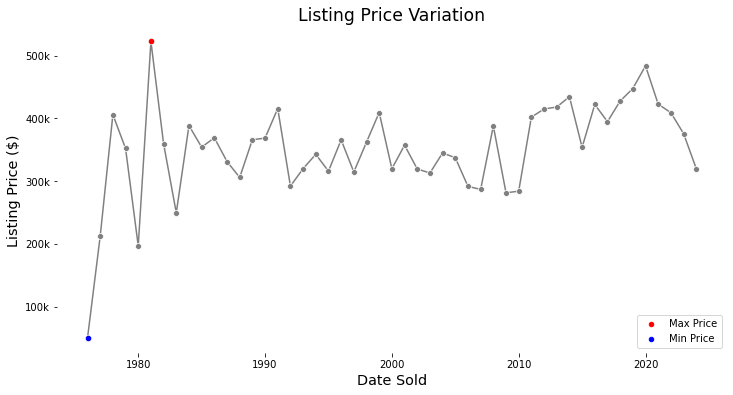

In [55]:
# Visualize listing prices over time

def thousands_formatter(x, pos):
    return '%1.0fk' % (x * 1e-3)

plt.figure(figsize=(12, 6))
sns.lineplot(x='soldOn_year', y='listPrice', data=df_no_outliers, marker="o", color='grey')
plt.scatter(max_price['soldOn_year'], max_price['listPrice'], color='red', s=20, zorder=5, label='Max Price')
plt.scatter(min_price['soldOn_year'], min_price['listPrice'], color='blue', s=20, zorder=5, label='Min Price')

plt.legend(fontsize="medium", loc='lower right')
plt.title('Listing Price Variation', fontsize='xx-large')
plt.xlabel('Date Sold', fontsize='x-large')
plt.ylabel('Listing Price ($)', fontsize='x-large')

# Set the y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.savefig('assignment4.jpg')
plt.show()

#### How have listing prices (listPrice) changed over time (soldOn) in the Chicago real estate market?

The analysis of listing prices (listPrice) over time (soldOn) in the Chicago real estate market, reveals a notable upward trend with some fluctuations. Initially, from the late 1970s to the early 1980s, there is a sharp increase in listing prices, followed by a period of relative stability. This initial surge can be attributed to various factors, such as economic growth, inflation, and an increase in demand for real estate during that period. The plot then shows periodic fluctuations but generally maintains a steady upward trajectory until the late 1990s.

In the years following 2000, the plot demonstrates more pronounced volatility with peaks and troughs, indicative of a more dynamic and perhaps unpredictable real estate market. This volatility may reflect broader economic cycles, including the housing market bubble and subsequent crash around 2008. Post-2010, the listing prices again exhibit a gradual increase, peaking around the mid-2010s before experiencing a decline towards 2020. This pattern suggests that while the overall trend in listing prices has been upward, external economic factors and market conditions have significantly influenced pricing dynamics, resulting in periods of both rapid increases and decreases in property values.